# California Housing Price Prediction

download dataset from here [https://www.kaggle.com/camnugent/california-housing-prices](https://www.kaggle.com/camnugent/california-housing-prices)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!dir | findstr -i housing.csv

30-Jan-21  06:15 PM         1,423,529 housing.csv


In [3]:
housing = pd.read_csv("housing.csv")
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


there are 20640 instances & 'total_bedrooms' has only 20433 non-null values (207 values missing)

In [5]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


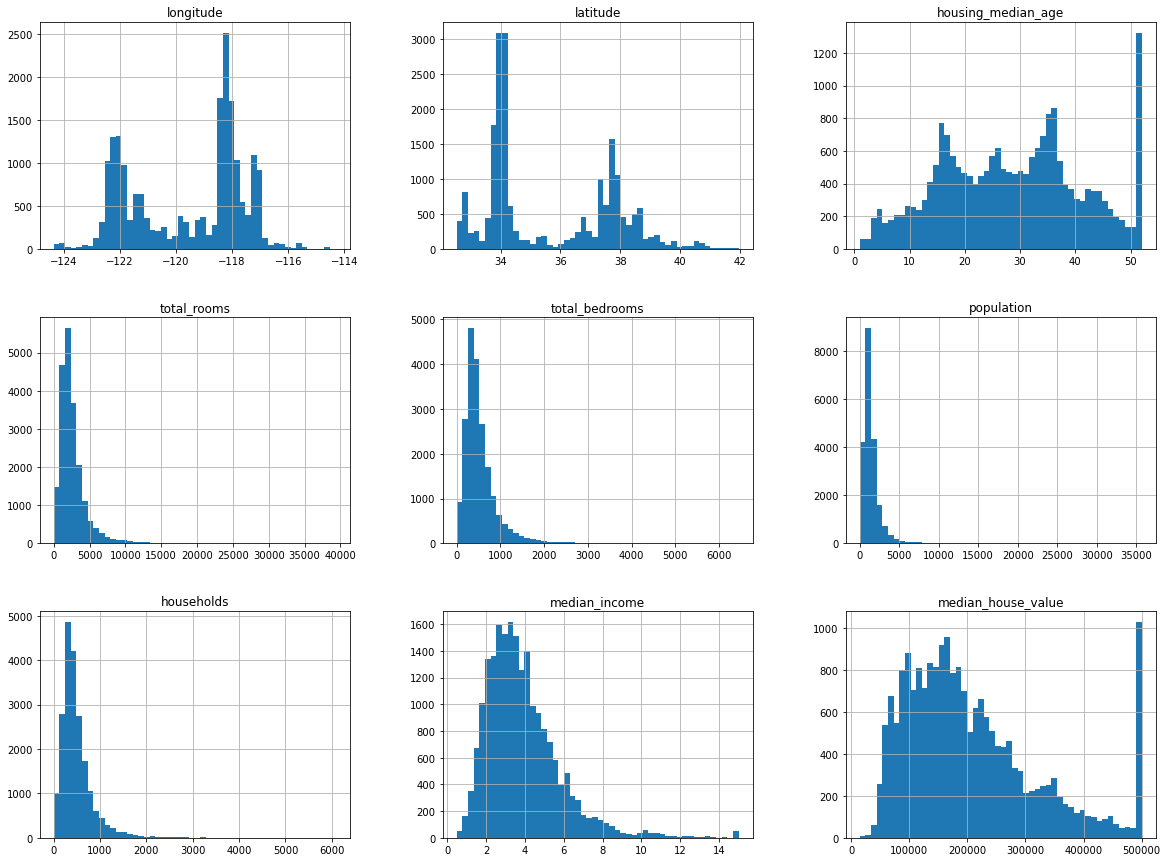

In [7]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

<AxesSubplot:>

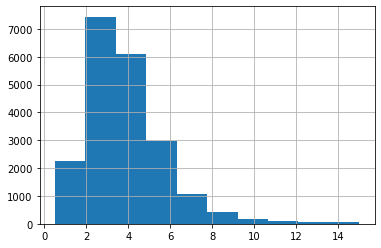

In [8]:
# median income looks like an imp feature

housing['median_income'].hist()

In [9]:
# dividing the income category to limit the number income category
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
# putting everything above 5th category as 5th category
housing['income_cat'].where(housing['income_cat'] < 5, other=5.0, inplace=True)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=29)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [11]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [12]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

**as seen above the proportions are maintained in the test set using stratified sampling**

**[why stratified?]** : because the feature-space are less and also because its a mid-sized dataset & we don't want to miss out any class


In [13]:
# experimenting: with random sampling now

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=29)

In [14]:
def income_cat_proportions(data):
    return data['income_cat'].value_counts() / len(data)


comparing_props = pd.DataFrame({
    "Overall Props": income_cat_proportions(housing),
    "Random": income_cat_proportions(test_set),
    "Stratified": income_cat_proportions(strat_test_set)
}).sort_index()

comparing_props["random %error"] = 100 * comparing_props["Random"] / comparing_props["Overall Props"] - 100
comparing_props["strat. %error"] = 100 * comparing_props["Stratified"] / comparing_props["Overall Props"] - 100
comparing_props

,Overall Props,Random,Stratified,random %error,strat. %error
1.0,0.039826,0.042636,0.039729,7.055961,-0.243309
2.0,0.318847,0.311531,0.318798,-2.294484,-0.015195
3.0,0.350581,0.344719,0.350533,-1.672195,-0.013820
4.0,0.176308,0.181686,0.176357,3.050289,0.027480
5.0,0.114438,0.119428,0.114583,4.360711,0.127011


In [15]:
for items in (strat_train_set, strat_test_set):
    items.drop("income_cat", axis=1, inplace=True)

In [16]:
housing = strat_train_set.copy()

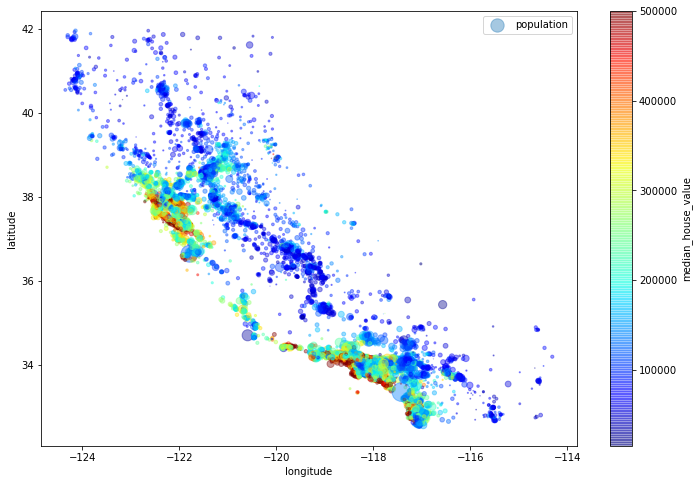

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

plt.legend()

FileNotFoundError: [Errno 2] No such file or directory: 'california.png'

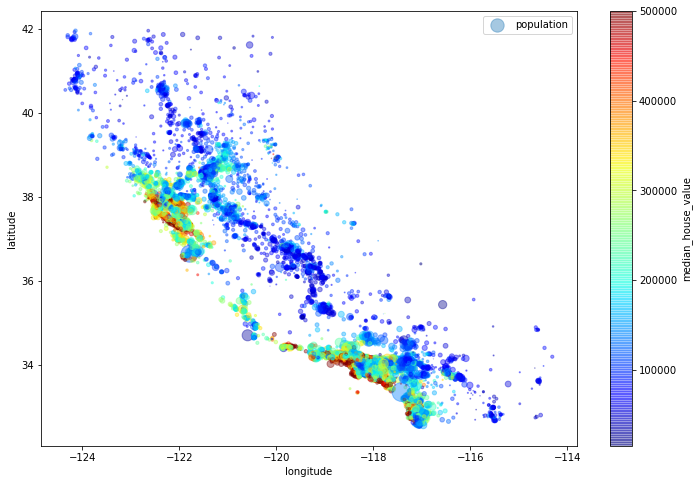

In [18]:
import matplotlib.image as mpimg

ax = housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing['population']/100, label="population", figsize=(12,8),
            c="median_house_value", cmap=plt.get_cmap("jet"), sharex=False)

# load the png image
california_img = mpimg.imread("california.png")

plt.imshow(california_img, extent=[-124.55, -113.8, 32.45, 42.05], alpha=0.5, cmap=plt.get_cmap("jet"))

plt.xlabel("Longitude", fontsize=14)
plt.ylabel("Latitude", fontsize=14)

plt.legend(fontsize=14)
plt.show()

### Looking for Correlations
(Pearson's Distance Correlation equation)

In [ ]:
# pandas has corr method for calculating correlations
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

its always between -1 (less correlated) and 1 (highly correlated)

In [ ]:
# other approach it to use the scatter plot in a A vs B fashion
# problem with this is that (for N features, there will be N^2 plots)

imp_attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

from pandas.plotting import scatter_matrix

scatter_matrix(housing[imp_attributes], figsize=(12, 8))

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

### Feature Engineering



In [ ]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

In [ ]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

**[observation]:** the new `bedrooms_per_room` is highly correlated but in a reciprocative way to the `median_house_value`, So the houses with lesser bedroom/room ratio will tend to be more expensive.

In [ ]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [ ]:
housing.describe()

# Preparing the data for ML algos

In [ ]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

#### some data cleansing

In [ ]:
# when calculating imputng value on your own
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)
sample_incomplete_rows

In [ ]:
# when using Scikit-Learn's Imputer class
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [ ]:
housing_num = housing.drop("ocean_proximity", axis=1)

imputer.fit(housing_num)

In [ ]:
# Imputer basically computes across all the attributes, so if you wanna see this across all the attributes, just call statistics_ method
imputer.statistics_

In [ ]:
housing_num.median().values

using the imputer we created above, transforming the training set by replacing the missing values by the learned medians

In [ ]:
X = imputer.transform(housing_num)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [ ]:
# cross check for missing value
housing_tr[housing_tr.isnull().any(axis=1)]

In [ ]:
housing_tr.head()

#### handling categorical values

In [ ]:
housing_cat = housing["ocean_proximity"]
housing_cat.head(10)

In [ ]:
# using pandas's own factorize() method to convert them into categorical features
housing_cat_encoded, housing_categories = housing_cat.factorize()

In [ ]:
housing_cat_encoded[:10]

In [ ]:
housing_categories

In [ ]:
# using Scikit-Learn's OneHotEncoder

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(1, -1))

In [ ]:
housing_cat_1hot

In [ ]:
# since 1 hot encoder returns a sparse matrix, need to change it to a dense array
housing_cat_1hot.toarray()

### Custom Transformations

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

#column indexes
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self # nothing to do here
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
housing_extra_attribs = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+["rooms_per_household", 
                                                                                           "population_per_household"])
housing_extra_attribs.head()

## Setting up Pipeline for all the preprocessings

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

In [ ]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, attribute_names):
        self.attibute_names = attribute_names
        
    def fit(self, X, y=None):
        return self # do nothing
    
    def transform(self, X, y=None):
        return X[self.attibute_names].values

In [ ]:
# complete Pipeline

num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
    ("selector", DataFrameSelector(num_attribs)),
    ("imputer", SimpleImputer(strategy="median")),
    ("attribs_adder", CombinedAttributesAdder()),
    ("std_scaler", StandardScaler())
])

cat_pipeline =Pipeline([
    ("selector", DataFrameSelector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

In [ ]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

## Selecting & Training Models

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

In [ ]:
# trying the full pipeline on a few training instances

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

some_data_prepared = full_pipeline.transform(some_data)

In [ ]:
print("Prediction: ", lin_reg.predict(some_data_prepared))
print("Actual Labels: ", list(some_labels))

In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

#### Cross Validation:

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("scores: ", scores)
    print("mean: ", scores.mean())
    print("std deviation: ", scores.std())
    
    
display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=29)
forest_reg.fit(housing_prepared, housing_labels)

In [ ]:
housing_pred = forest_reg.predict(housing_prepared)

forest_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, cv=10, scoring="neg_mean_squared_error")

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

## Fine Tuning Model: 

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

rf_reg = RandomForestRegressor()

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring="neg_mean_squared_error")

grid_search.fit(housing_prepared, housing_labels)

In [ ]:
# to get the best combination of hyperparameters
grid_search.best_params_

In [ ]:
# to get the best estimators directly
grid_search.best_estimator_

In [ ]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params_distibs = {
    'n_estimators': randint(low=1, high=200),
    'max_features': randint(low=1, high=8),
}

rf_reg = RandomForestRegressor(random_state=29)

rnd_search = RandomizedSearchCV(rf_reg, param_distributions=params_distibs, n_iter=10, 
                                cv=5, scoring="neg_mean_squared_error", random_state=29)

rnd_search.fit(housing_prepared, housing_labels)

In [ ]:
cvres = rnd_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

In [ ]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

In [ ]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)